# Forward and backward propagation

Forward propagation: Process data and produce output

Backward propagation: learn from errors and improve networks accurace


Word on activiation functions:

Sigmoid

The sigmoid function or logistic function generates an S-shape curve. An example is a logistic function:

$\sigma(x) = \frac{e^x}{1+e^x}=1-\sigma(-x)$

It can be used to predict probabilities. Cross Entropy Loss is the difference between the actual and expected value.

ReLU

Rectified Linear Unit (LeLU) most commonly used and based on a piecewise function. Output is from 9 to infinity:

$f(x) =[0 \ if \ x < 0;\ x \ if \ x \geq 0] = max(0,x)$

Several extensions exists (leaky, exponential).

Softmax

Generalisation of sigmoid and usually applied to final layer:

$f(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}}$

Output is probabilities for each class of possible outputs.


# 1. Backpropagation

Move through network from output to input layer, updating the weights using gradient descent. We generate random numbers from N(0, 0.1), then multiply with weights and add a bias.

Then we use the L2 norm as a loss function between the output and the target variable.

In [54]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

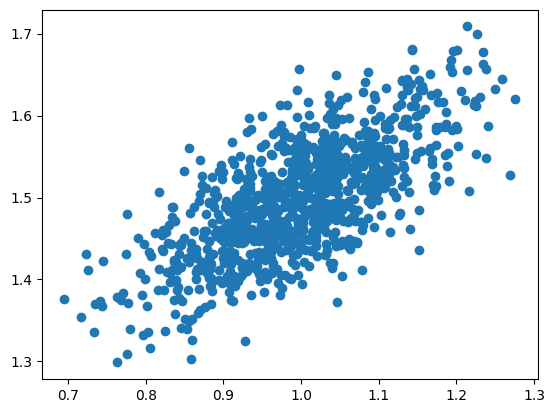

In [55]:
# Drawing 1000 from normally distribution
np.random.seed(0)

# X values
x_vals = np.random.normal(1, 0.1, 1000).astype(np.float32)
a = 0
b = 0.5
error = np.random.normal(0, 0.05, 1000) 

# Y values
y_vals = (1 + b*x_vals + error).astype(np.float32)
plt.scatter(x_vals, y_vals)
plt.show()

In [56]:
# Define output
def output(X, weights, biases):
    return tf.add(tf.multiply(X, weights), biases)


# Next we add our L2 loss function to be applied ot the results of the network
def loss_func(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred - y_true))


Say we have a function $f(x)=\frac{1}{n}\sum_{i=1}^nQ_i(w)$ and $w$ is the parameter which minimizes $Q()$ and we want to estimate it. Gradient descent is then:

$w = w - \eta\nabla Q(w)=w-\frac{\eta}{n}\sum_{i=1}^n\nabla Q_i(w)$.

$w$ is iteratively updated, $\eta$ is the learning rate and $\nabla$ the gradient.

Learning Rates:

smaller: slower convergence more accurate

larger: less accurcate but faster convergence

In [57]:
# Define optimizers
opt = tf.optimizers.SGD(learning_rate=0.03)

In [58]:
# Now we can initalize our network (weights and biases)
tf.random.set_seed(1)
np.random.seed(0)

# Initialization
weights = tf.Variable(tf.random.normal(shape=[1]))
biases = tf.Variable(tf.random.normal(shape=[1]))

# Recording list to help visualize the optimization steps
history = list()

In [59]:
# Loop through the training algorithm
for i in range(1000):
    # Setting random index
    rand_index = np.random.choice(1000)
    # Choosing random index in both our x's and y's
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    with tf.GradientTape() as tape:
        predictions = output(rand_x, weights, biases)
        loss = loss_func(rand_y, predictions)
    history.append(loss.numpy())
    gradients = tape.gradient(loss, [weights, biases])
    opt.apply_gradients(zip(gradients, [weights, biases]))
    if(i+1) % 25 == 0:
        print(f"step # {i+1} Weights: {weights.numpy()} Biases: {biases.numpy()}")

step # 25 Weights: [-0.03684212] Biases: [1.4632788]
step # 50 Weights: [0.0040826] Biases: [1.496832]
step # 75 Weights: [0.01425252] Biases: [1.502614]
step # 100 Weights: [0.02155178] Biases: [1.5058045]
step # 125 Weights: [0.01917661] Biases: [1.4981297]
step # 150 Weights: [0.00355488] Biases: [1.4754878]
step # 175 Weights: [0.0346251] Biases: [1.4959683]
step # 200 Weights: [0.02526009] Biases: [1.4774412]
step # 225 Weights: [0.02238047] Biases: [1.4684651]
step # 250 Weights: [0.03432387] Biases: [1.4689796]
step # 275 Weights: [0.04394614] Biases: [1.4739463]
step # 300 Weights: [0.03971216] Biases: [1.4619944]
step # 325 Weights: [0.03966405] Biases: [1.4570403]
step # 350 Weights: [0.03512506] Biases: [1.4466957]
step # 375 Weights: [0.04907968] Biases: [1.4577193]
step # 400 Weights: [0.05673423] Biases: [1.4575607]
step # 425 Weights: [0.05452622] Biases: [1.451962]
step # 450 Weights: [0.05861282] Biases: [1.4533262]
step # 475 Weights: [0.06446321] Biases: [1.4523969]


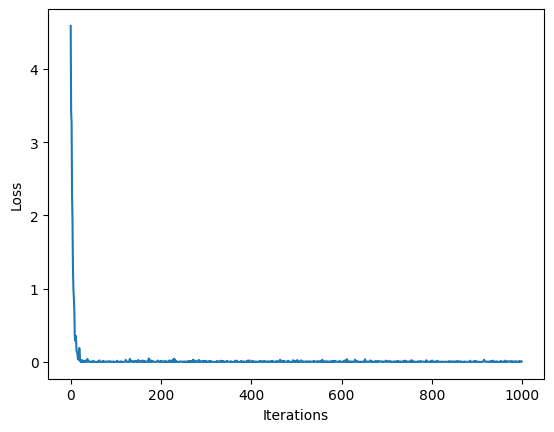

In [60]:
# Visualization
plt.plot(history)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

## Forward Propagation Example

Forward going through the network. We have to define each hidden layer and feed it with data (input), processes it using an activation function and then has an an output.

Two classes red and yellow and we want to classify this binary problem. We assume one hidden layer and again a sigmoid activiation function.

In this exercise we program the forward propagation and the network by hand.


In [61]:
# Other packages are needed
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn import datasets
import seaborn as sns
import imageio
from IPython.display import HTML

(2000, 2) (2000,)


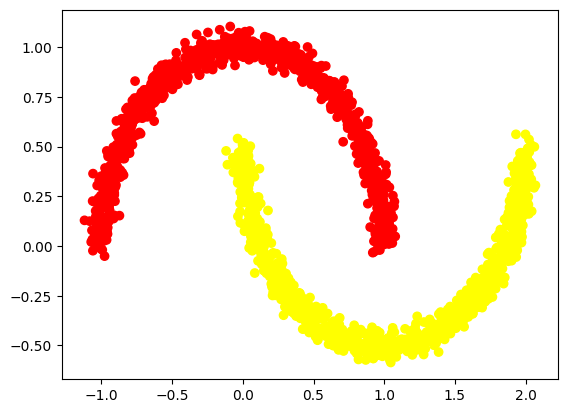

In [62]:
np.random.seed(0)

# Extracting the data and labels
data, labels = datasets.make_moons(n_samples=2000, noise=0.04, random_state=0)

# Print out the shape of both the data and labels
print(data.shape, labels.shape)

# Setting colors
color_map = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow"])

# Plotting both the data and the labels
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=color_map)
plt.show()

In [63]:
# Divide into training (75%) and test set (25%) by default
x_train, x_test, y_train, y_test = train_test_split(data, labels, stratify=labels, random_state=0)
print(x_train.shape, x_test.shape)

(1500, 2) (500, 2)


In [64]:
# Next we deifne the feedforward network
class FeedForwardNetwork:
 
 def __init__(self):
     np.random.seed(0)
     self.w1_11 = np.random.randn()
     self.w1_12 = np.random.randn()
     self.w1_21 = np.random.randn()
     self.w1_22 = np.random.randn()
     self.w2_11 = np.random.randn()
     self.w2_12 = np.random.randn()
     self.b1_1 = 0
     self.b1_2 = 0
     self.b2_1 = 0
 
 def sigmoid(self, x):
     return 1.0/(1.0 + np.exp(-x))
 
 def forward_pass(self, x):
     self.x1, self.x2 = x
     self.a1_1 = self.w1_11*self.x1 + self.w1_12*self.x2 + self.b1_1
     self.z1_1 = self.sigmoid(self.a1_1)
     self.a1_2 = self.w1_21*self.x1 + self.w1_22*self.x2 + self.b1_2
     self.z1_2 = self.sigmoid(self.a1_2)
     self.a2_1 = self.w2_11*self.z1_1 + self.w2_12*self.z1_2 + self.b2_1
     self.z2_1 = self.sigmoid(self.a2_1)
     forward_matrix = np.array([[0,0,0,0,self.z2_1,0,0,0], 
                      [0,0,( self.w2_11*self.z1_1),        (self.w2_12*self.z1_2),self.b2_1,self.a2_1,0,0],
                      [0,0,0,self.z1_1,0,0,0,self.z1_2],
                      [(self.w1_11*self.x1), (self.w1_12*self.x2),         self.b1_1, self.a1_1,(self.w1_21*self.x1),(self.w1_22*self.x2), self.b1_2,  self.a1_2]])
     forward_matrices.append(forward_matrix)
     return self.z2_1    

In [65]:
# We run the forward propagation for each observation, we obtain random values for each "w" and then multiply it with the "observed" value, lastly we progress to the next layer
forward_matrices = []
ffn = FeedForwardNetwork()
for x in x_train:
    ffn.forward_pass(x)

print(forward_matrices[1])

[[ 0.          0.          0.          0.          0.51591626  0.
   0.          0.        ]
 [ 0.          0.          0.92234152 -0.85865496  0.          0.06368657
   0.          0.        ]
 [ 0.          0.          0.          0.49387571  0.          0.
   0.          0.87861905]
 [-0.4195286   0.39503021  0.         -0.0244984  -0.2327644   2.21218182
   0.          1.97941743]]


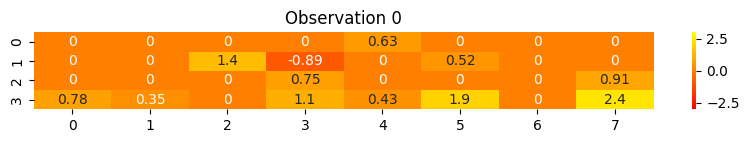

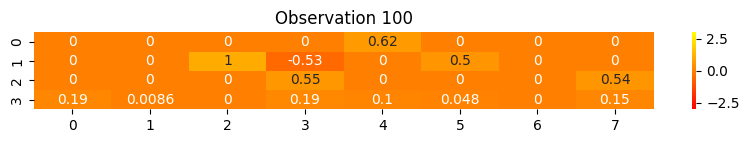

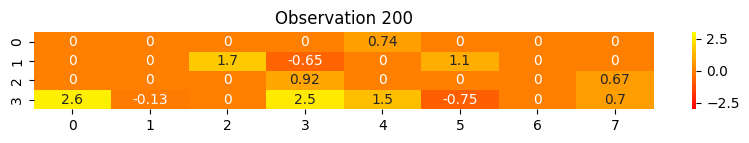

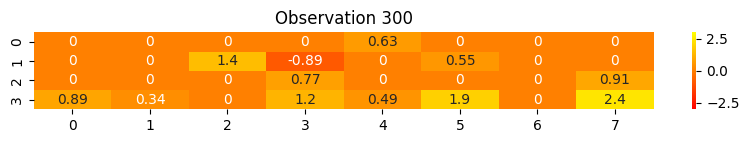

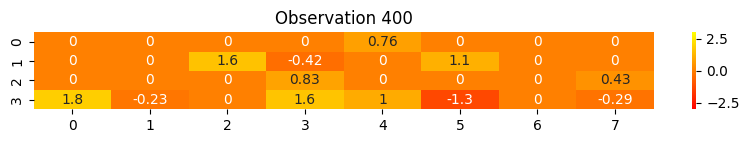

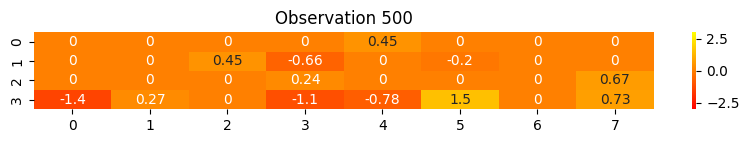

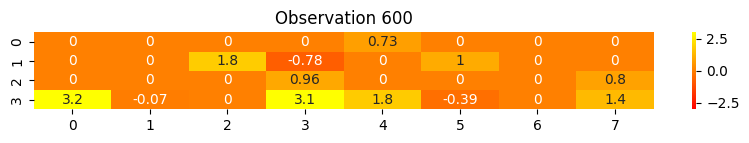

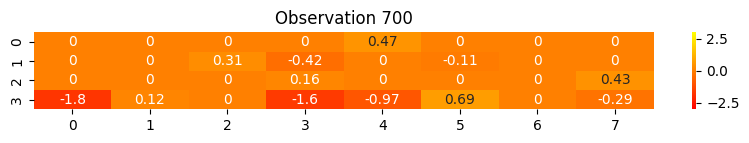

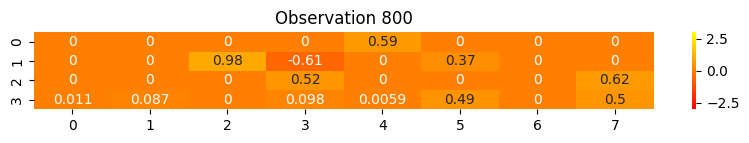

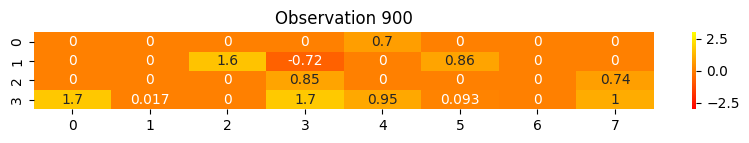

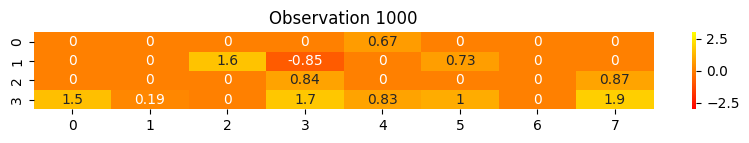

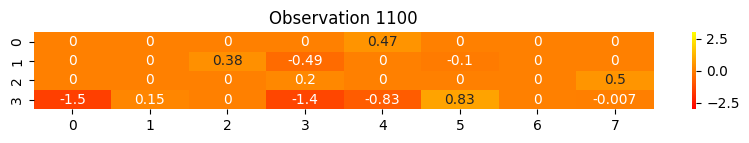

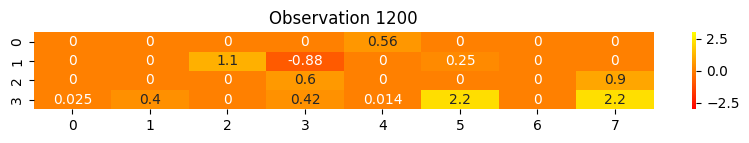

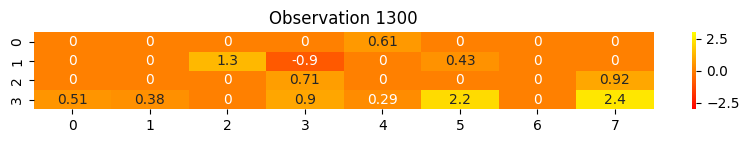

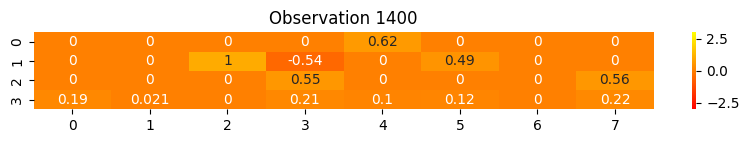

In [66]:
def plot_heat_map(observation):
    fig = plt.figure(figsize=(10, 1))
    sns.heatmap(forward_matrices[observation], annot=True,     cmap=color_map, vmin=-3, vmax=3)
    plt.title('Observation '+str(observation))    
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.buffer_rgba(), dtype='uint8')
    return image

for i in range(0,len(forward_matrices),len(forward_matrices)//15):
    plot_heat_map(i) 

## Backward and Forward Propagation with data

In this exercise we mix backward and forward to run a simple neural network. We use the iris dataset from scikit learn. The dataset has 3 different types of irises and their characteristics. 


In [67]:
# Load the Iris dataset from Sklearn
iris = datasets.load_iris()

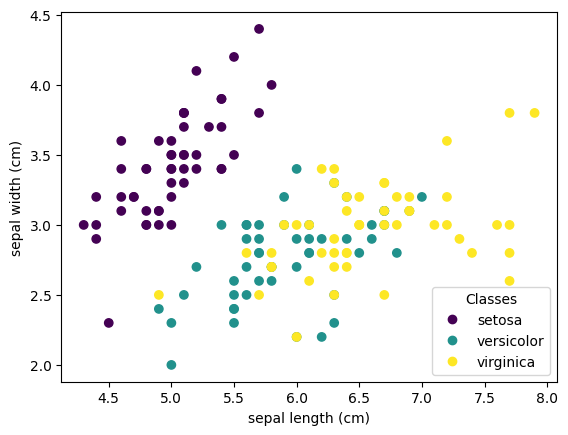

In [68]:
# Plotting the data
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [69]:
# Extract both the features (X) and the target labels (Y)
X = iris.data

Y = iris.target


# Splitting the data intro training and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print('Shape original data')
print(X.shape)
print(Y.shape)
print('Shape training data')
print(x_train.shape)
print(y_train.shape)
print('Shape testing data')
print(x_test.shape)
print(y_test.shape)

Shape original data
(150, 4)
(150,)
Shape training data
(120, 4)
(120,)
Shape testing data
(30, 4)
(30,)


In [70]:
# Define the neural network arcitechture
hidden_layer_size = 32
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation="relu", input_shape = (x_train.shape[1],)),
    tf.keras.layers.Dense(3, activation="softmax")   # 3 classes for Iris dataset
    ])

# Model summary output
model.summary()

c:\Users\henrik.knudsen\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259 (1.01 KB)

 Trainable params: 259 (1.01 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
# Define hyperparameters
learning_rate = 0.001
epochs = 1000
hidden_layer_size = 10

# Define the loss function and optimizer
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD(learning_rate)

In [72]:
# Now implement the backpropagation on the trained model in a loop called training loop. 
 
# Iterate through a specified number of training epochs
for epoch in range(epochs):
 
    # Use TensorFlow's GradientTape to record operations for automatic differentiation
    with tf.GradientTape() as tape:
 
        # Forward pass: Compute predictions (logits) by passing training data through the neural network
        predictions = model(x_train)
 
        # Calculate the loss by comparing predicted logits with the true training labels (y_train)
        loss_value = loss_fn(y_train, predictions)
 
    # Backpropagation: Compute gradients of the loss with respect to model parameters
    grads = tape.gradient(loss_value, model.trainable_variables)
 
    # Apply the computed gradients to update the model's parameters using the specified optimizer
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
 
    # Print the loss at regular intervals to monitor training progress
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss_value.numpy()}")


Epoch 100/1000, Loss: 1.2367782592773438
Epoch 200/1000, Loss: 1.1241670846939087
Epoch 300/1000, Loss: 1.033608317375183
Epoch 400/1000, Loss: 0.9580153822898865
Epoch 500/1000, Loss: 0.8937225341796875
Epoch 600/1000, Loss: 0.838344156742096
Epoch 700/1000, Loss: 0.7902315855026245
Epoch 800/1000, Loss: 0.7481796741485596
Epoch 900/1000, Loss: 0.7112520933151245
Epoch 1000/1000, Loss: 0.6787050366401672


# Homework: Regularisation

In this exercise we want to compare different algorithms for the backward propagation step. Models are often overfitted or underfitted, i.e. they work well the the training data but fail with general data or the model is too simplyfied for the data resulting in low variance and high bias.

Regularisation helps against over and under fitting by adding a loss term to the penalty.

L1 regularisation (LASSO)

$|w_i|_1 = \sum_i|w_i|$

$Loss = Error(y,\hat{y}) + \lambda \sum_{i=1}^N|w_i|$

L2 regularisation (Ridge Regression; eight decay in the context of neural networks)

$|w_i|^2_2 = \sum_i|w_i|$

$Loss = Error(y,\hat{y}) + \lambda \sum_{i=1}^N|w_i|^2$


In [73]:
# Specify which package
from tensorflow import keras

(train_images, train_labels),(test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
validation_images = train_images[:5000]
validation_labels = train_labels[:5000]

In [74]:
# Setting the learning rate
learn_rate = 0.01

# Our model without any regularization
model = keras.models.Sequential([
    keras.layers.Input(shape=[28, 28]),
    keras.layers.Flatten(),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

# Summary of the L1_model
model.summary()

# Initialize new SGD
sgd = keras.optimizers.SGD(learn_rate)

# Compile and Fit
model.compile(loss="sparse_categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=2, validation_data=(validation_images, validation_labels))

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 182,660 (713.52 KB)

 Trainable params: 182,660 (713.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6490 - loss: 1.0793 - val_accuracy: 0.8158 - val_loss: 0.5448
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8235 - loss: 0.5031 - val_accuracy: 0.8384 - val_loss: 0.4660


In [75]:
# Now we specify with L1 regularization
hyper_para = 0.01

model_l1 = keras.models.Sequential([
    keras.layers.Input(shape=[28, 28]),
    keras.layers.Flatten(),
    keras.layers.Dense(200, activation="relu", kernel_regularizer=keras.regularizers.l1(hyper_para)),
    keras.layers.Dense(100, activation="relu", kernel_regularizer=keras.regularizers.l1(hyper_para)),
    keras.layers.Dense(50, activation="relu", kernel_regularizer=keras.regularizers.l1(hyper_para)),
    keras.layers.Dense(10, activation="softmax"),
])

# Summary of the L1_model
model_l1.summary()

# Initialize new SGD
sgd = keras.optimizers.SGD(learn_rate)

# Compile and Fit
model_l1.compile(loss="sparse_categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
model_l1.fit(train_images, train_labels, epochs=2, validation_data=(validation_images, validation_labels))

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 182,660 (713.52 KB)

 Trainable params: 182,660 (713.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5904 - loss: 35.7698 - val_accuracy: 0.6618 - val_loss: 1.9873
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6663 - loss: 1.7707 - val_accuracy: 0.7234 - val_loss: 1.4304


In [76]:
# Now we use the L2 regularizers

model_l2 = keras.models.Sequential([
    keras.layers.Input(shape=[28, 28]),  # Input layer with the input shape defined
    keras.layers.Flatten(),
    keras.layers.Dense(200, activation="relu", kernel_regularizer=keras.regularizers.l2(hyper_para)),
    keras.layers.Dense(100, activation="relu", kernel_regularizer=keras.regularizers.l2(hyper_para)),
    keras.layers.Dense(50, activation="relu", kernel_regularizer=keras.regularizers.l2(hyper_para)),
    keras.layers.Dense(10, activation="softmax"),
])

# Summary of the L1_model
model_l2.summary()

# Initialize new SGD
sgd = keras.optimizers.SGD(learn_rate)

# Compile and Fit
model_l2.compile(loss="sparse_categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
model_l2.fit(train_images, train_labels, epochs=2, validation_data=(validation_images, validation_labels))

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 182,660 (713.52 KB)

 Trainable params: 182,660 (713.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6296 - loss: 5.5734 - val_accuracy: 0.8102 - val_loss: 3.2010
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8087 - loss: 2.8126 - val_accuracy: 0.8282 - val_loss: 1.8963


In [77]:
# Define a function to evaluate and print the model's performance
def evaluate_and_print(model, model_name, test_images, test_labels):
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    print(f"{model_name} - Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Evaluate and print the results for each model
evaluate_and_print(model, "Model (No Regularization)", test_images, test_labels)
evaluate_and_print(model_l1, "Model_L1 (L1 Regularization)", test_images, test_labels)
evaluate_and_print(model_l2, "Model_L2 (L2 Regularization)", test_images, test_labels)


Model (No Regularization) - Test Loss: 0.5183, Test Accuracy: 0.8167
Model_L1 (L1 Regularization) - Test Loss: 1.4582, Test Accuracy: 0.7085
Model_L2 (L2 Regularization) - Test Loss: 1.9358, Test Accuracy: 0.8032
